<a href="https://colab.research.google.com/github/meghamaryvinu/NeuroNexus/blob/main/NeuroNexus_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
path='/content/drive/MyDrive/tested.csv'
df=pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print("\nDataset shape:", df.shape)

print("\nDataset info:")
print(df.info())



Dataset shape: (418, 12)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [ ]:
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


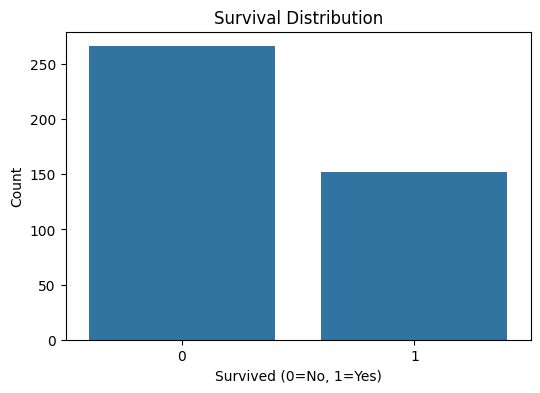

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Count')

plt.show()

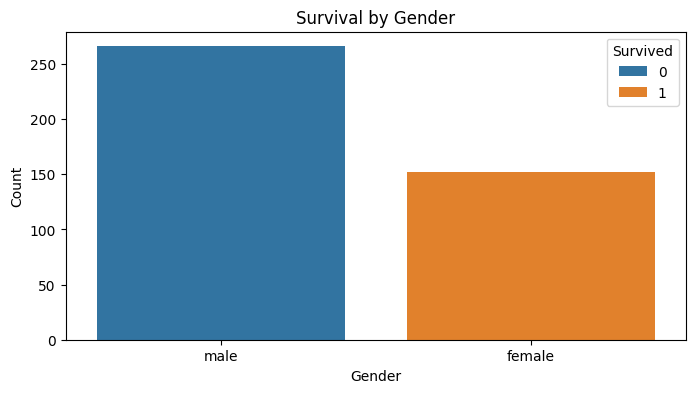

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

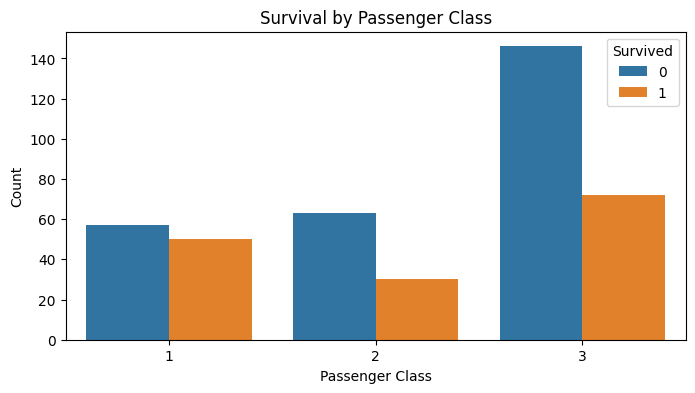

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')

plt.show()

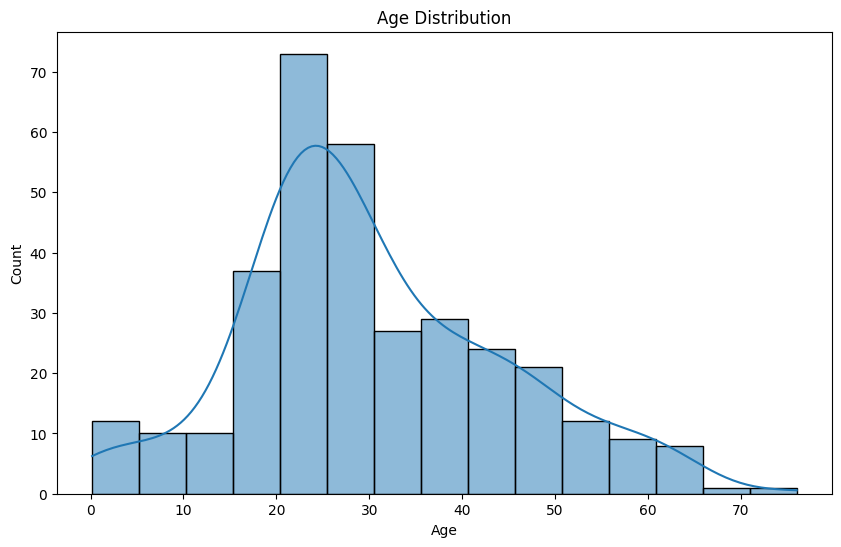

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

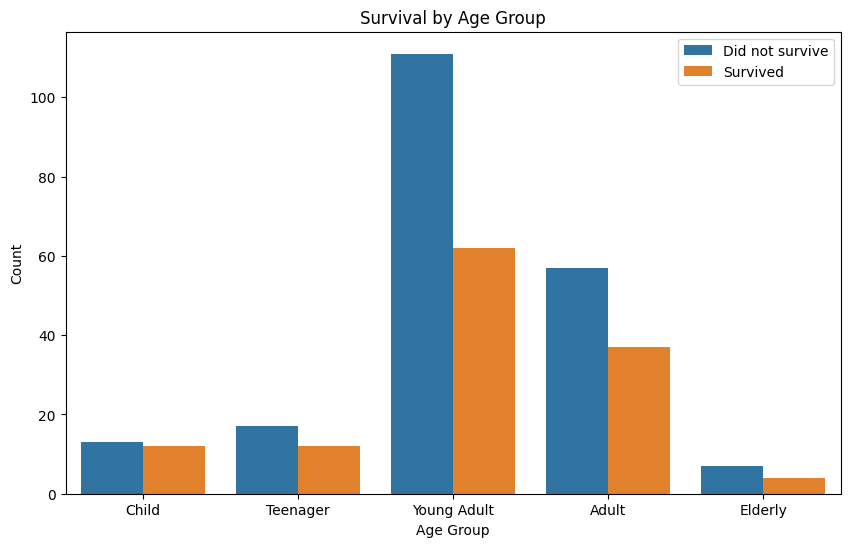

In [ ]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Elderly'])
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', hue='Survived', data=df)
plt.title('Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(labels=['Did not survive', 'Survived'])

plt.show()

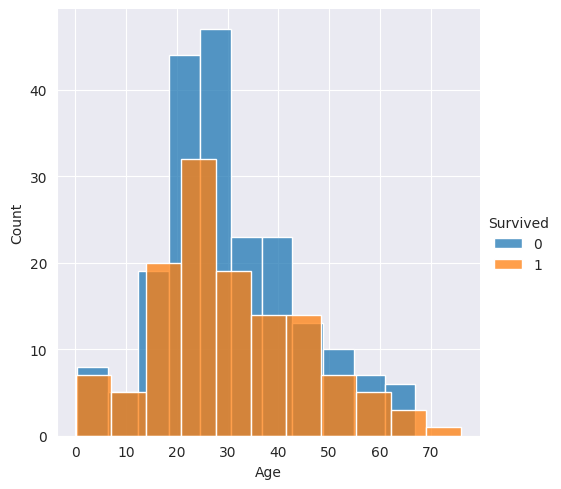

In [ ]:
sns.FacetGrid(df,hue='Survived',height=5).map(sns.histplot,'Age').add_legend()

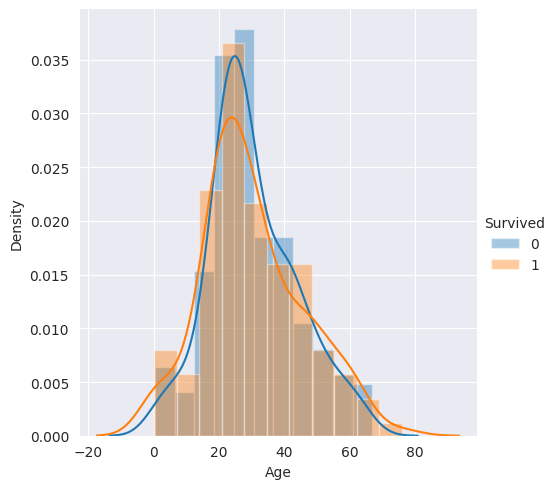

In [ ]:
sns.FacetGrid(df,hue='Survived',height=5).map(sns.distplot,'Age').add_legend()

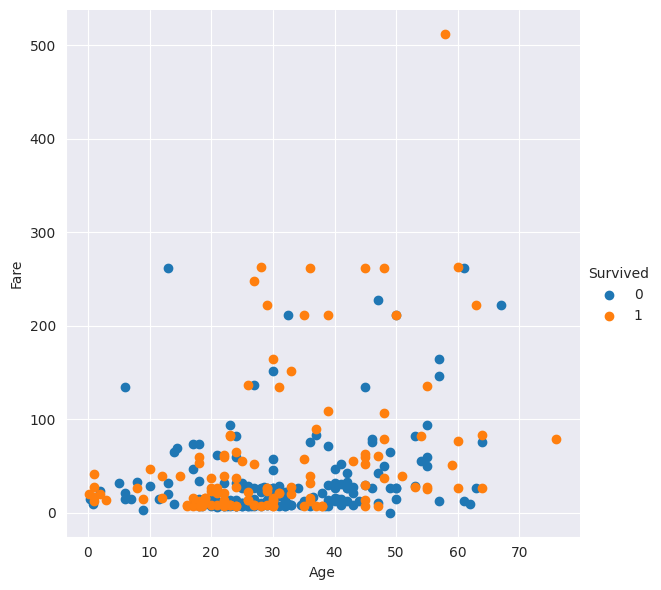

In [ ]:
sns.set_style('darkgrid')
sns.FacetGrid(df,hue='Survived',height=6).map(plt.scatter,'Age','Fare').add_legend()

Joint Distribution of Age and Fare 


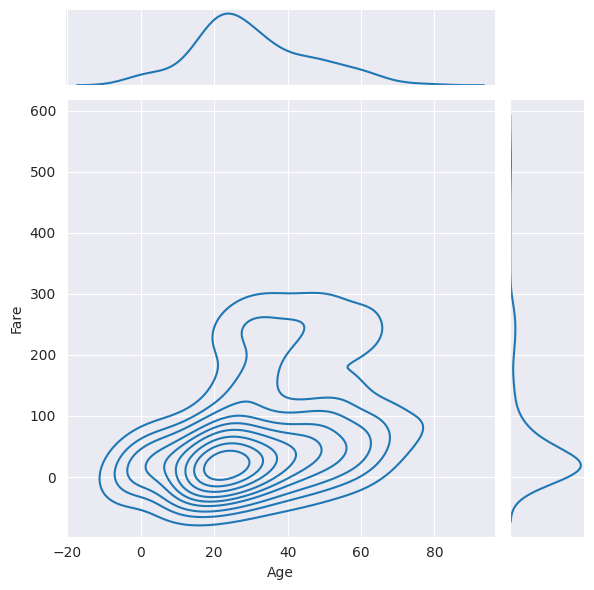

In [ ]:
male=df.loc[df['Sex']=='male'];
female=df.loc[df['Sex']=='female']
print('Joint Distribution of Age and Fare ')

sns.jointplot(x='Age',y='Fare',data=female,kind='kde')

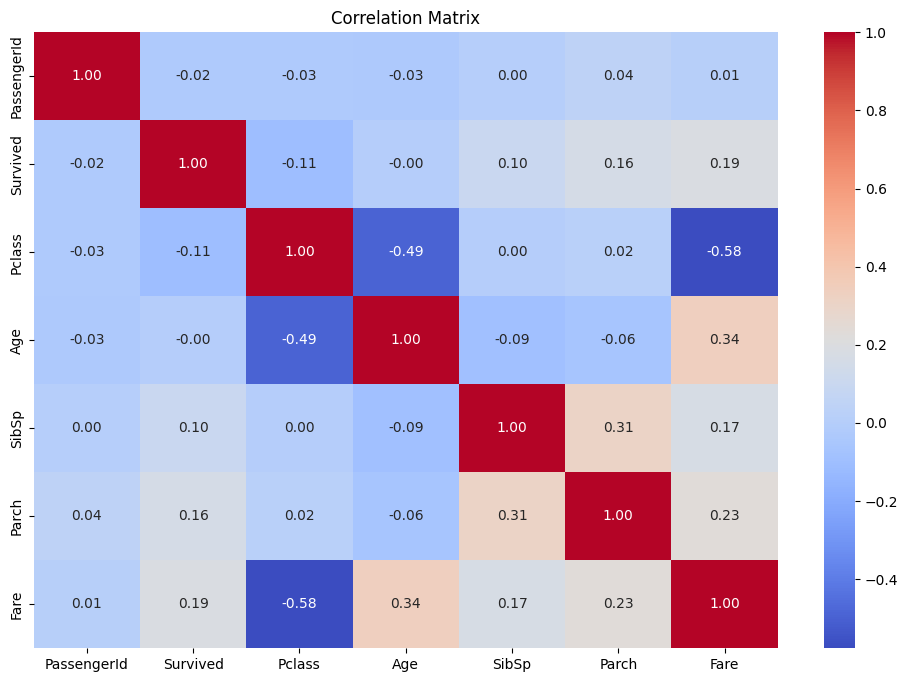

In [ ]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

plt.show()

In [ ]:
# Data preparation for modeling
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define preprocessing for numerical and categorical features
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [ ]:
# Create and train the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [ ]:
# Model evaluation
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



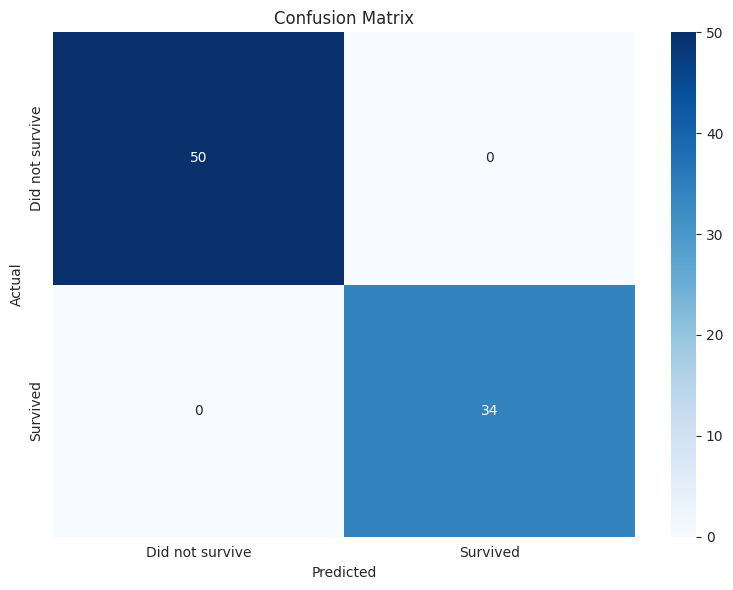

In [ ]:
# Confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did not survive', 'Survived'],
            yticklabels=['Did not survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [ ]:
# Cross-validation for more robust evaluation
cv_scores = cross_val_score(model, X, y, cv=5)
print("\n5-Fold Cross-validation scores:", cv_scores)
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")



5-Fold Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV accuracy: 1.0000
Standard deviation: 0.0000


In [ ]:
# Example predictions
def predict_passenger(passenger):
    """Make survival prediction for a passenger"""
    passenger_df = pd.DataFrame([passenger])
    prediction = model.predict(passenger_df)[0]
    probability = model.predict_proba(passenger_df)[0][1]

    result = 'Survived' if prediction == 1 else 'Did not survive'
    return result, probability

In [ ]:
# Example 1: First class female
passenger1 = {
    'Pclass': 1,
    'Sex': 'female',
    'Age': 29,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 100,
    'Embarked': 'C'
}

# Example 2: Third class male
passenger2 = {
    'Pclass': 3,
    'Sex': 'male',
    'Age': 24,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 8,
    'Embarked': 'S'
}

In [ ]:
print("\nExample predictions:")
result1, prob1 = predict_passenger(passenger1)
print(f"First class female passenger: {result1} (Probability: {prob1:.4f})")

result2, prob2 = predict_passenger(passenger2)
print(f"Third class male passenger: {result2} (Probability: {prob2:.4f})")

print("\nTitanic survival prediction model completed!")


Example predictions:
First class female passenger: Survived (Probability: 1.0000)
Third class male passenger: Did not survive (Probability: 0.0000)

Titanic survival prediction model completed!
